In [1]:
#Task 1: write the base code for the optical model
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
"""
)

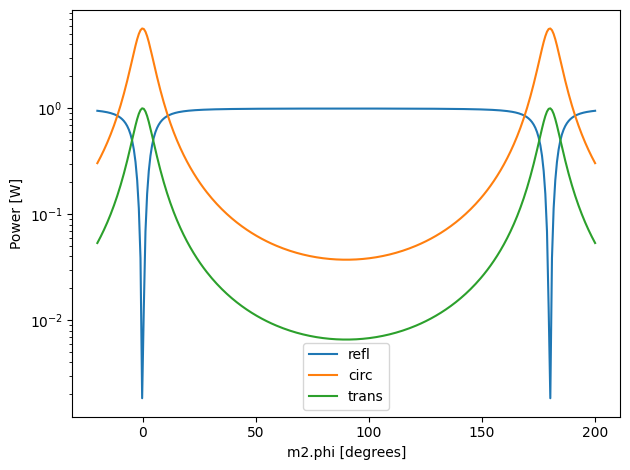

In [2]:
#Task 2: add the three photodiodes & simulate the response of the cavity as the tuning of M2 is varied.
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(m2.phi,lin,-20,200,300)
"""
)
out = model.run()
out.plot(logy=True);

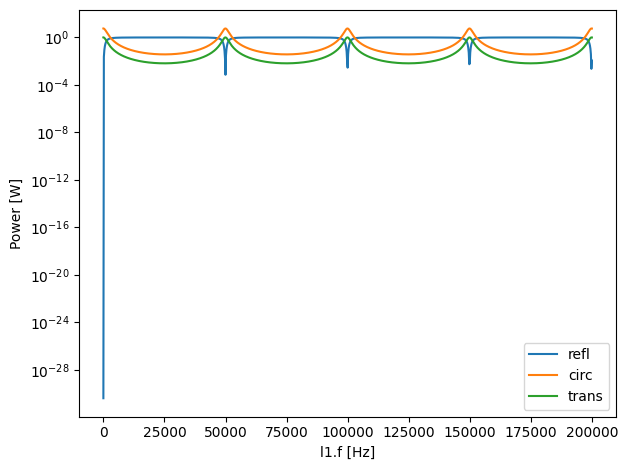

In [3]:
#Task 3: simulate the response of the cavity as the laser frequency is varied
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(l1.f,lin,0,200k,1000)
"""
)
out = model.run()
out.plot(logy=True);

In [6]:
import numpy as np
from scipy.signal import find_peaks_cwt
import finesse
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=0.85 T=0.15
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(m2.phi,lin,0,200k,1000)
"""
)

out = model.run()

# Extract relevant data from the simulation output
x_values = out.x
circ_values = out["circ"]

peaks = find_peaks_cwt(out["circ"], np.arange(1, 10))
peak_frequencies = x_values[peaks]

# Calculate the Free Spectral Range (FSR)
fsr = np.diff(peak_frequencies)
average_fsr = np.mean(fsr)

print("Resonant Frequencies (Hz):", peak_frequencies)
print("Free Spectral Range (FSR) (Hz):", fsr)
print("Average FSR (Hz):", average_fsr)

TypeError: only integer scalar arrays can be converted to a scalar index

Text(0.5, 0, 'f [Hz]')

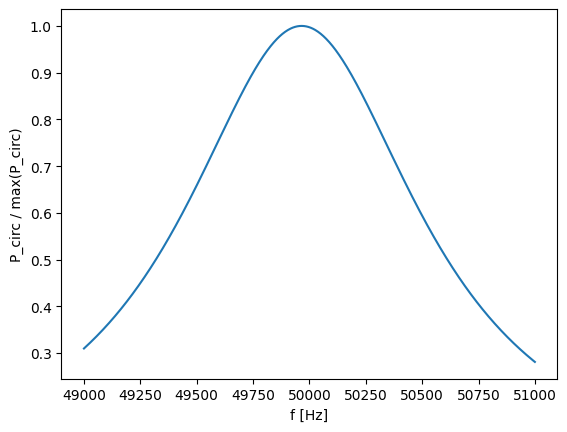

In [7]:
import finesse
import matplotlib.pyplot as plt
model = finesse.Model()
model.parse(
    """
laser l1 P=1 phase=0
mirror m1 R=0.85 T=0.15
mirror m2 R=1.0 T=0
space s1 l1.p1 m1.p1 L=0.1
s CAV m1.p2 m2.p1 L=3000
pd refl m1.p1.o
pd circ m1.p2.i
pd trans m2.p2.o
xaxis(l1.f,lin,49k,51k,1000)
"""
)
out = model.run()
plt.plot(out.x[0], out['circ']/out['circ'].max())

plt.ylabel("P_circ / max(P_circ)")
plt.xlabel("f [Hz]")

In [8]:
import numpy as np
FSR= 50000
print("Modelled finesse =", FSR/1300)
# calculate the Finesse from the reflectivity of the input mirror
print("Calculated finesse =", np.pi / (1 - np.sqrt(0.85)) )

Modelled finesse = 38.46153846153846
Calculated finesse = 40.25331978158252
